In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import warnings
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle
from sklearn.pipeline import Pipeline
%matplotlib inline
warnings.filterwarnings('ignore')
#scikit learn 1.2.2 is used to write this notes

In [2]:
df=pd.read_csv("loan_approved.csv")

## Basic Checks

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# EDA

In [10]:
!pip install ydata-profiling

In [11]:
profile=ProfileReport(df,title="EDA",explorative=False)

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Checking for outliers

<Axes: >

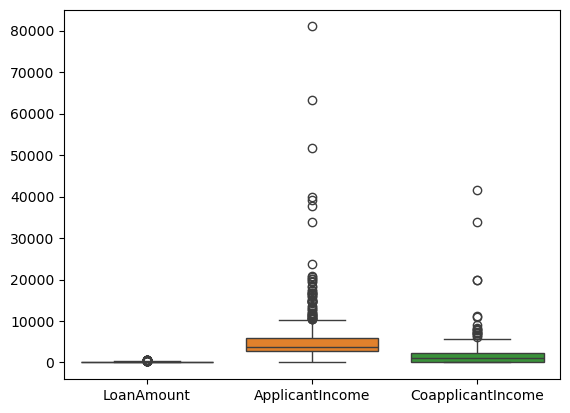

In [15]:
sns.boxplot(df[['LoanAmount','ApplicantIncome','CoapplicantIncome']])

# Checking Co-relation of continuous data

In [17]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

<Axes: >

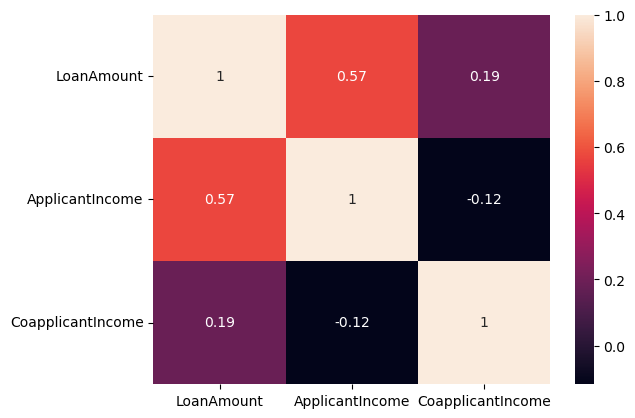

In [18]:
sns.heatmap(df[['LoanAmount','ApplicantIncome','CoapplicantIncome']].corr(),annot=True)

# Insights from EDA

## You will write your own insights

# Pre Processing

In [22]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

# Gender

- We will apply OHE for Gender

# Married

In [26]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

- Any baisc encoding like ordinal or label
- Label encoder is better cause it is easiser
- Label encoder output format is not fit for the Column Trasformer so we are definig a modified label encoder where we are cahnging the output shape of Label Encoder

# Dependents

In [36]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [37]:
df['Dependents'].isnull().sum()

15

- we will use ordinal encoder for Dependents

# Education

In [40]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

- in banks when they are calcukating risk factor of people Graduation has default more bias for that if we use Label Encoder then Graduate will become 0 so we will use Ordinal Encoder

# Self Employed

In [43]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

- we cant decide the hirearchy here so we are using OHE

# Applicant Income , CoapplicantIncome and LoanAmount

In [46]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


- we will apply Stadared scaler for these column

# Loan Amount Term

In [49]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [50]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

- we will divide the Loan amount term by 12 and pass years other than that any type of scaling or no processing is okay
- Scaling in not Mandatory but is highly suggestible so try changing the scaling step with multiple scaling types and see which performs better on your own

In [52]:
def divide_by_12(x):
    return (x/12)

- we can use FunctionTrasformer to use our own custom function for transformation
- So we will use this custom function whe we are defining the pipeline

# Credit_History

In [55]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

- Credit histroy is a very important factor for Loan approval
- So we will use LabelEncoder for Credit histroy

# Property_Area

In [58]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

- Property area is nomnal category in the banking sector they dont have importance for loan approval so we will apply OHE to trat every property with equal importance

# Loan Status( Approved)

In [61]:
df['Loan_Status (Approved)'].value_counts()

Loan_Status (Approved)
Y    422
N    192
Name: count, dtype: int64

- THis is a Label column we will apply Label Encoder for this column

# Creating the Preprocessing Pipeline

- We need to drop Loan_id column
- We will create seperate lists of columns on the basis of preprocessing steps that are getting applied to them

In [66]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

In [69]:
#We need to impute Null values in the dataframe we will use simple imputers and we will have two categories here one with discrete null values and one with continuous null values
dis_null_cols=['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']
cont_null_cols=['LoanAmount']
OHE_columns=["Self_Employed",'Property_Area','Gender']
standard_scaler=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
function_trasformer=["Loan_Amount_Term"]
label_encoder=["Married"]
pass_through=['Credit_History']
#we need to define ordinalencoder seperately for every column as we have to define the order of categories
dependents_enc=OrdinalEncoder(categories=[['0', '1', '2', '3+']])
education_enc=OrdinalEncoder(categories=[['Not Graduate','Graduate']])

### Steps of preprocesing for features:
- LabelEncoder for Married,Credit_histroy
- OrdinalEncoder for Dependents,Education
- One hot encoder for Self Employed,Property_area,Gender
- FucntionTransformer for Loan_Amount_term
- Standard scaler for Applicant Income , CoapplicantIncome and LoanAmount
- Credit histroy will pass through
### Steps of preprocessing for Label
- LabelEncoder for Loan_Status (Approved)

In [71]:
custom=FunctionTransformer(divide_by_12)

In [72]:
class ModifiedLabelEncoder(LabelEncoder):
    def fit_transform(self, y, *args, **kwargs):
        return super().fit_transform(y).reshape(-1, 1)

    def transform(self, y, *args, **kwargs):
        return super().transform(y).reshape(-1, 1)

In [73]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

In [74]:
def same(x):
    return x

In [ ]:
no_trans=FunctionTransformer(same)

preprocessor=ColumnTransformer([("OHE columns",OneHotEncoder(),OHE_columns),("Label_encoder",ModifiedLabelEncoder(),"Married"),
                                ("standard_scaler",StandardScaler(),standard_scaler),("custom",custom,function_trasformer),("pass through",no_trans,["Credit_History"]),
("ordinal dependents",dependents_enc,['Dependents']),("ordinal education",education_enc,['Education']),("Label Label encoder",ModifiedLabelEncoder(),["Loan_Status (Approved)"])])

In [77]:
preprocessor

ColumnTransformer(transformers=[('OHE columns', OneHotEncoder(),
                                 ['Self_Employed', 'Property_Area', 'Gender']),
                                ('Label_encoder', ModifiedLabelEncoder(),
                                 'Married'),
                                ('standard_scaler', StandardScaler(),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount']),
                                ('custom',
                                 FunctionTransformer(func=<function divide_by_12 at 0x0000025029B5E0C0>),
                                 ['Loan_Amount_Term']),
                                ('pass through',
                                 FunctionTransformer(func=<function same at 0x0000025029B6A700>),
                                 ['Credit_History']),
                                ('ordinal dependents',
                                 OrdinalEncoder(categories=[['0', '1', '2',
                                                             '3+']]),
                                 ['Dependents']),
                                ('ordinal education',
                                 OrdinalEncoder(categories=[['Not Graduate',
                                                             'Graduate']]),
                                 ['Education']),
                                ('Label Label encoder', ModifiedLabelEncoder(),
                                 ['Loan_Status (Approved)'])])

In [78]:
with open("preprocessing1.pkl","wb") as f:
    pickle.dump(preprocessor,f)

In [98]:
#pickle.dump(preprocessor,file)

In [107]:
f.close()